In [1]:
project_dir = os.path.split(os.getcwd())[0]
if project_dir not in sys.path:
    sys.path.append(project_dir)

ipdl_dir = os.path.join(project_dir, "ipdl/")
if ipdl_dir not in sys.path:
    sys.path.append(ipdl_dir)

In [2]:
import os
import torch
from torch import tensor, Tensor
from torch import nn
from matplotlib import pyplot as plt

from IPDL import MatrixBasedRenyisEntropy, TensorKernel

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

dir = sorted(os.listdir("matrices"))
mi_layer = []
Ax = torch.load(os.path.join("matrices", "input.pth")).to(device)
Ay = torch.load(os.path.join("matrices", "output.pth")).to(device)

Ixt = []
Ity = []
for x in dir:
    name = os.path.join("matrices", x)
    if os.path.isdir(name):
        filenames = sorted(list(map(lambda x: os.path.join(name, x), os.listdir(name))))
        Ixt_layer = []
        Ity_layer = []
        for file in filenames:
            A = torch.load(file).to(device)
            Ixt_tmp = list(map(lambda x: MatrixBasedRenyisEntropy.mutualInformation(Ax, A[x]).cpu(), range(len(A))))
            Ity_tmp = list(map(lambda x: MatrixBasedRenyisEntropy.mutualInformation(A[x], Ay).cpu(), range(len(A))))
            Ixt_layer.extend(Ixt_tmp)
            Ity_layer.extend(Ity_tmp)
        
        Ixt.append(Ixt_layer)
        Ity.append(Ity_layer)



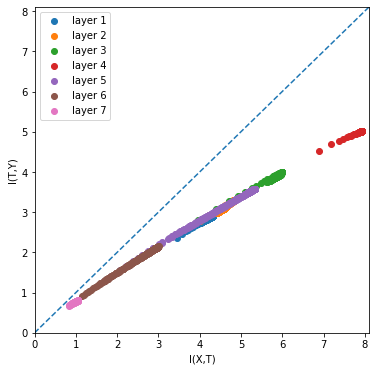

In [4]:
f, ax = plt.subplots(figsize=(6, 6))
reference = MatrixBasedRenyisEntropy.entropy(Ax).cpu()
ax.set(xlim=(0, reference), ylim=(0, reference))

for idx, current_Ixt in enumerate(Ixt):
    current_Ity = Ity[idx]
    ax.scatter(current_Ixt, current_Ity, label="layer {}".format(idx+1))

ax.set_xlabel("I(X,T)")
ax.set_ylabel("I(T,Y)")
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='dashed')
plt.legend()
f.show()


In [5]:
import numpy as np
mutualInformation_xt = np.zeros((7, 350))
mutualInformation_ty = np.zeros((7, 350))
x_entropy = MatrixBasedRenyisEntropy.entropy(Ax).cpu().numpy()

In [6]:
for i in range(len(Ixt)):
    mutualInformation_xt[i] = np.array(Ixt[i])
    mutualInformation_ty[i] = np.array(Ity[i])

In [7]:
np.save('matrices/Ixt',mutualInformation_xt)
np.save('matrices/Ity',mutualInformation_ty)
np.save('matrices/x_entropy',x_entropy)

In [8]:
for i in range(len(Ixt)):
    mutualInformation_xt[i] = np.array(Ixt[i])
    mutualInformation_ty[i] = np.array(Ity[i])

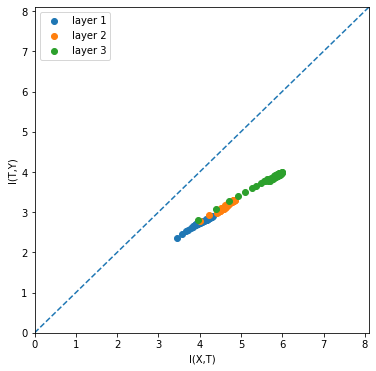

In [37]:
mutualInformation_xt = np.load('matrices/Ixt.npy')
mutualInformation_ty = np.load('matrices/Ity.npy')
reference = np.load('matrices/x_entropy.npy')

f, ax = plt.subplots(figsize=(6, 6))
ax.set(xlim=(0, reference), ylim=(0, reference))


it_idxs = gen_log_space(350, 50)
for idx in range(len(mutualInformation_xt)):
    if idx > 2:
        break
    current_Ixt = mutualInformation_xt[idx][it_idxs]
    current_Ity = mutualInformation_ty[idx][it_idxs]
    ax.scatter(current_Ixt, current_Ity, label="layer {}".format(idx+1))

ax.set_xlabel("I(X,T)")
ax.set_ylabel("I(T,Y)")
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='dashed')
plt.legend()
f.show()

In [26]:
index = np.logspace(0.1, 1, 10, endpoint=True)
index

array([1.25892541e+00, 9.50118507e+03, 7.17060097e+07, 5.41169527e+11,
       4.08423865e+15, 3.08239924e+19, 2.32630507e+23, 1.75567629e+27,
       1.32501936e+31, 1.00000000e+35])

In [27]:
import numpy as np

def gen_log_space(limit, n):
    '''
        code from: https://stackoverflow.com/questions/12418234/logarithmically-spaced-integers
    '''
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

In [28]:
gen_log_space(350, 50)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  18,  19,  21,  23,  26,  28,  31,  34,  37,  41,
        44,  49,  53,  58,  64,  70,  76,  84,  91, 100, 109, 120, 131,
       143, 157, 171, 187, 205, 224, 244, 267, 292, 319, 349],
      dtype=uint64)

In [33]:
a = np.arange(350)
gen_log_space(350, 50)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  18,  19,  21,  23,  26,  28,  31,  34,  37,  41,
        44,  49,  53,  58,  64,  70,  76,  84,  91, 100, 109, 120, 131,
       143, 157, 171, 187, 205, 224, 244, 267, 292, 319, 349])